In [1]:
import openeo
# import ProcessBuilder functions
from openeo.processes import ProcessBuilder
import rasterio
import numpy as np
import matplotlib.pyplot as plt
from shapely.geometry import Polygon

# General Introduction

## Connection establisment

In [22]:
# Establish a connection to openeo
dcConnection = openeo.connect("openeofed.dataspace.copernicus.eu")

In [23]:
dcConnection.authenticate_oidc()

Authenticated using refresh token.


<Connection to 'https://openeofed.dataspace.copernicus.eu/openeo/1.2/' with OidcBearerAuth>

In [9]:
dcConnection.list_collection_ids()

['SENTINEL3_OLCI_L1B',
 'SENTINEL3_SLSTR',
 'SENTINEL_5P_L2',
 'COPERNICUS_VEGETATION_PHENOLOGY_PRODUCTIVITY_10M_SEASON1',
 'COPERNICUS_VEGETATION_PHENOLOGY_PRODUCTIVITY_10M_SEASON2',
 'ESA_WORLDCOVER_10M_2021_V2',
 'COPERNICUS_VEGETATION_INDICES',
 'SENTINEL2_L1C',
 'SENTINEL2_L2A',
 'SENTINEL1_GRD',
 'COPERNICUS_30',
 'LANDSAT8_L2',
 'SENTINEL3_SYN_L2_SYN',
 'SENTINEL3_SLSTR_L2_LST',
 'SENTINEL1_GLOBAL_MOSAICS',
 'ESA_WORLDCEREAL_ACTIVECROPLAND',
 'ESA_WORLDCEREAL_IRRIGATION',
 'ESA_WORLDCEREAL_TEMPORARYCROPS',
 'ESA_WORLDCEREAL_WINTERCEREALS',
 'ESA_WORLDCEREAL_MAIZE',
 'ESA_WORLDCEREAL_SPRINGCEREALS',
 'CGLS_GDMP300_V1_GLOBAL',
 'CGLS_GDMP_V2_GLOBAL',
 'CGLS_LAI300_V1_GLOBAL',
 'CGLS_FAPAR300_V1_GLOBAL',
 'CGLS_NDVI300_V2_GLOBAL',
 'SENTINEL3_SYNERGY_VG1',
 'SENTINEL3_SYNERGY_VG10',
 'TERRASCOPE_S2_FAPAR_V2',
 'TERRASCOPE_S2_NDVI_V2',
 'TERRASCOPE_S2_LAI_V2',
 'PROBAV_L3_S10_TOC_333M',
 'PROBAV_L3_S5_TOC_100M',
 'PROBAV_L3_S1_TOC_100M',
 'PROBAV_L3_S1_TOC_333M',
 'TERRASCOPE_S5P_L3

In [19]:
vitoConnection = openeo.connect("openeo.vito.be")

In [20]:
vitoConnection.authenticate_oidc()

Authenticated using refresh token.


<Connection to 'https://openeo.vito.be/openeo/1.2/' with OidcBearerAuth>

In [10]:
# List collections available on the openEO back-end
vitoConnection.list_collection_ids()

['MAPEO_WATER_TUR_V1',
 'COP_DEM_EU_25M',
 'ESA_WORLDCEREAL_ACTIVECROPLAND',
 'ESA_WORLDCEREAL_IRRIGATION',
 'ESA_WORLDCEREAL_TEMPORARYCROPS',
 'ESA_WORLDCEREAL_WINTERCEREALS',
 'ESA_WORLDCEREAL_MAIZE',
 'ESA_WORLDCEREAL_SPRINGCEREALS',
 'CGLS_GDMP300_V1_GLOBAL',
 'CGLS_GDMP_V2_GLOBAL',
 'CGLS_LAI300_V1_GLOBAL',
 'CGLS_FAPAR300_V1_GLOBAL',
 'CGLS_NDVI300_V2_GLOBAL',
 'SENTINEL1_GRD_SIGMA0',
 'S1_GRD_SIGMA0_ASCENDING',
 'S1_GRD_SIGMA0_DESCENDING',
 'SENTINEL3_SYNERGY_VG1',
 'SENTINEL3_SYNERGY_VG10',
 'TERRASCOPE_S2_FAPAR_V2',
 'TERRASCOPE_S2_NDVI_V2',
 'TERRASCOPE_S2_LAI_V2',
 'TERRASCOPE_S2_FCOVER_V2',
 'TERRASCOPE_S2_TOC_V2',
 'TERRASCOPE_S1_SLC_COHERENCE_V1',
 'SENTINEL1_GAMMA0_SENTINELHUB',
 'SENTINEL1_GRD',
 'SENTINEL2_L1C_SENTINELHUB',
 'SENTINEL2_L2A_SENTINELHUB',
 'SENTINEL2_L2A_MOSAIC_120',
 'PROBAV_L3_S10_TOC_333M',
 'PROBAV_L3_S5_TOC_100M',
 'PROBAV_L3_S1_TOC_100M',
 'PROBAV_L3_S1_TOC_333M',
 'TERRASCOPE_S5P_L3_NO2_TD',
 'TERRASCOPE_S5P_L3_NO2_TM',
 'TERRASCOPE_S5P_L3_NO2_TY'

In [13]:
#Describe the structure of the specific dataset present in the collection
vitoConnection.describe_collection("SENTINEL2_L2A")

{'cube:dimensions': {'bands': {'type': 'bands',
   'values': ['B01',
    'B02',
    'B03',
    'B04',
    'B05',
    'B06',
    'B07',
    'B08',
    'B8A',
    'B09',
    'B11',
    'B12',
    'AOT',
    'SCL',
    'SNW',
    'CLD',
    'CLP',
    'CLM',
    'sunAzimuthAngles',
    'sunZenithAngles',
    'viewAzimuthMean',
    'viewZenithMean',
    'dataMask',
    'relativeAzimuthAngles',
    'viewZenithAngles']},
  't': {'extent': ['2015-07-06T00:00:00Z', None], 'type': 'temporal'},
  'x': {'axis': 'x',
   'extent': [-180, 180],
   'reference_system': {'$schema': 'https://proj.org/schemas/v0.2/projjson.schema.json',
    'area': 'World',
    'bbox': {'east_longitude': 180,
     'north_latitude': 90,
     'south_latitude': -90,
     'west_longitude': -180},
    'coordinate_system': {'axis': [{'abbreviation': 'Lat',
       'direction': 'north',
       'name': 'Geodetic latitude',
       'unit': 'degree'},
      {'abbreviation': 'Lon',
       'direction': 'east',
       'name': 'Geodetic longitude',
       'unit': 'degree'}],
     'subtype': 'ellipsoidal'},
    'datum': {'ellipsoid': {'inverse_flattening': 298.257223563,
      'name': 'WGS 84',
      'semi_major_axis': 6378137},
     'name': 'World Geodetic System 1984',
     'type': 'GeodeticReferenceFrame'},
    'id': {'authority': 'OGC', 'code': 'Auto42001', 'version': '1.3'},
    'name': 'AUTO 42001 (Universal Transverse Mercator)',
    'type': 'GeodeticCRS'},
   'step': 10,
   'type': 'spatial'},
  'y': {'axis': 'y',
   'extent': [-56, 83],
   'reference_system': {'$schema': 'https://proj.org/schemas/v0.2/projjson.schema.json',
    'area': 'World',
    'bbox': {'east_longitude': 180,
     'north_latitude': 90,
     'south_latitude': -90,
     'west_longitude': -180},
    'coordinate_system': {'axis': [{'abbreviation': 'Lat',
       'direction': 'north',
       'name': 'Geodetic latitude',
       'unit': 'degree'},
      {'abbreviation': 'Lon',
       'direction': 'east',
       'name': 'Geodetic longitude',
       'unit': 'degree'}],
     'subtype': 'ellipsoidal'},
    'datum': {'ellipsoid': {'inverse_flattening': 298.257223563,
      'name': 'WGS 84',
      'semi_major_axis': 6378137},
     'name': 'World Geodetic System 1984',
     'type': 'GeodeticReferenceFrame'},
    'id': {'authority': 'OGC', 'code': 'Auto42001', 'version': '1.3'},
    'name': 'AUTO 42001 (Universal Transverse Mercator)',
    'type': 'GeodeticCRS'},
   'step': 10,
   'type': 'spatial'}},
 'description': '[Sentinel-2 Level 2A](https://docs.terrascope.be/#/DataProducts/Sentinel-2/Level2A/Level2A) product, processed from L1C by Sen2Cor. \n Use the [Terrascope viewer](https://viewer.terrascope.be/?language=nl&bbox=0.9339867511378304,50.14520994379217,6.207424251137831,51.77292299745045&overlay=false&bgLayer=MapBox&date=2019-02-25T03:17:15.000Z&layer=CGS_S2_RADIOMETRY) to explore the data. \n\n ',
 'extent': {'spatial': {'bbox': [[-180, -56, 180, 83], [-180, -56, 180, 83]]},
  'temporal': {'interval': [['2015-07-06T00:00:00Z', None],
    ['2016-11-01T00:00:00Z', None]]}},
 'id': 'SENTINEL2_L2A',
 'keywords': ['VITO',
  'TERRASCOPE',
  'COPERNICUS',
  'ESA',
  'Orthoimagery',
  'Sentinel-2',
  'MSI',
  'Level-2A',
  'Radiometry',
  'Plant Resource',
  'TOC'],
 'license': 'proprietary',
 'links': [{'href': 'https://sentinel.esa.int/documents/247904/690755/Sentinel_Data_Legal_Notice',
   'rel': 'license'},
  {'href': 'https://services.terrascope.be/catalogue/description?collection=urn:eop:VITO:TERRASCOPE_S2_TOC_V2',
   'rel': 'alternate'},
  {'href': 'https://viewer.terrascope.be/?language=nl&bbox=0.9339867511378304,50.14520994379217,6.207424251137831,51.77292299745045&overlay=false&bgLayer=MapBox&date=2019-02-25T03:17:15.000Z&layer=CGS_S2_RADIOMETRY',
   'rel': 'alternate'},
  {'href': 'https://services.terrascope.be/wmts/v2',
   'rel': 'wmts',
   'wmts:layer': 'CGS_S2_RADIOMETRY'},
  {'href': 'https://collections.eurodatacube.com/stac/sentinel-2-l2a.json',
   'rel': 'self'},
  {'href': 'https://services.sen

## Spatial and temporal extent definitions

In [12]:
meiseSpatial = {"west": 4.312323, "south":  50.922796, "east": 4.335497, "north": 50.934860}
bxlSpatial = {"west": 4.264069, "south":  50.696458, "east": 4.984360, "north": 50.940258}
belgiumSpatial = {"west": 2.537842, "south": 49.500242, "east": 6.388550, "north": 51.515580}
europeSpatial = {"west": -23.203125, "south": 34.452218, "east": 30.937500, "north": 71.074056}

## Data cube creation and downloading raw data

### Datacube creation

In [45]:
datacubeBE = dcConnection.load_collection( #Access the different available collections
    "SENTINEL2_L2A", #Specify the collection name
    spatial_extent=belgiumSpatial, #Define a spatial window
    temporal_extent = ["2021-06-01", "2021-06-01"], # Define a temporal window
    bands=["B04","B03", "B02","B05", "B08", "B11"] # Define which measured bands are required. 
)

In [49]:
datacubeBE = datacubeBE.resample_spatial(10)

The allowed formats for openeo are 'GTiff', 'netCDF', 'JSON', 'CovJSON', 'GeoJSON', 'PNG', 'Parquet', 'CSV'

### Direct download

In [17]:
datacubeMeise.download("dataCubeMeiseTest.tiff")

### Downloading through batch job

In [50]:
res = datacubeBE.save_result(format = "GTIFF")

# send job to back-end
job = res.create_job(title = "BETest")
job.start_and_wait()
job.get_results().download_files("BETest")

0:00:00 Job 'cdse-j-25042312215642e28cdd10e034db410c': send 'start'
0:00:14 Job 'cdse-j-25042312215642e28cdd10e034db410c': queued (progress 0%)
0:00:19 Job 'cdse-j-25042312215642e28cdd10e034db410c': queued (progress 0%)
0:00:25 Job 'cdse-j-25042312215642e28cdd10e034db410c': queued (progress 0%)
0:00:33 Job 'cdse-j-25042312215642e28cdd10e034db410c': queued (progress 0%)
0:00:44 Job 'cdse-j-25042312215642e28cdd10e034db410c': queued (progress 0%)
0:00:57 Job 'cdse-j-25042312215642e28cdd10e034db410c': queued (progress 0%)
0:01:12 Job 'cdse-j-25042312215642e28cdd10e034db410c': queued (progress 0%)
0:01:32 Job 'cdse-j-25042312215642e28cdd10e034db410c': queued (progress 0%)
0:01:56 Job 'cdse-j-25042312215642e28cdd10e034db410c': queued (progress 0%)
0:02:26 Job 'cdse-j-25042312215642e28cdd10e034db410c': queued (progress 0%)
0:03:04 Job 'cdse-j-25042312215642e28cdd10e034db410c': queued (progress 0%)
0:03:50 Job 'cdse-j-25042312215642e28cdd10e034db410c': running (progress N/A)
0:04:49 Job 'cdse-

[WindowsPath('BETest/openEO_2021-06-01Z.tif'),
 WindowsPath('BETest/job-results.json')]

In [51]:
# Open the GeoTIFF file
file_path = "BETest\openEO_2021-06-01Z.tif"
with rasterio.open(file_path) as dataset:
    # Read the data into a numpy array
    data = dataset.read()
print(data.shape)

(6, 1530, 1860)


<>:2: SyntaxWarning: invalid escape sequence '\o'
<>:2: SyntaxWarning: invalid escape sequence '\o'
C:\Users\niels\AppData\Local\Temp\ipykernel_41240\3996841293.py:2: SyntaxWarning: invalid escape sequence '\o'
  file_path = "BETest\openEO_2021-06-01Z.tif"


In [52]:
data

array([[[-32768, -32768, -32768, ...,    629,    629,    766],
        [-32768, -32768, -32768, ...,    629,    629,    766],
        [-32768, -32768, -32768, ...,    504,    504,    513],
        ...,
        [-32768, -32768, -32768, ...,    811,    811,     60],
        [-32768, -32768, -32768, ...,    374,    374,    282],
        [-32768, -32768, -32768, ...,    374,    374,    282]],

       [[-32768, -32768, -32768, ...,    735,    735,    800],
        [-32768, -32768, -32768, ...,    735,    735,    800],
        [-32768, -32768, -32768, ...,    641,    641,    664],
        ...,
        [-32768, -32768, -32768, ...,    917,    917,    393],
        [-32768, -32768, -32768, ...,    626,    626,    595],
        [-32768, -32768, -32768, ...,    626,    626,    595]],

       [[-32768, -32768, -32768, ...,    597,    597,    551],
        [-32768, -32768, -32768, ...,    597,    597,    551],
        [-32768, -32768, -32768, ...,    541,    541,    470],
        ...,
        [-32

In [153]:
def printMinMaxAvg(arr):
    return (np.amax(arr), np.amin(arr), np.mean(arr))

In [154]:
printMinMaxAvg(data[0])

(np.int16(4408), np.int16(126), np.float64(645.3991505590708))

In [155]:
printMinMaxAvg(data[1])

(np.int16(4704), np.int16(189), np.float64(815.8624859148825))

In [156]:
printMinMaxAvg(data[2])

(np.int16(4716), np.int16(121), np.float64(491.4960128282916))

### Band Math and transformed cubes

Extracting bands in this way flattens the bands and removes their band dimensions which also destroys the metadata structure of the band in question

In [173]:
#Performing mathematical operations can be done by assigning new variables containing the band
redBand = datacubeMeise.band("B04")*0.001
greenBand = datacubeMeise.band("B03")*0.001
blueBand = datacubeMeise.band("B02")*0.001
nirBand = datacubeMeise.band("B08")*0.001
ndviBand = (nirBand-redBand)/(nirBand+redBand)

Combining 2 of these flattened bands into a cube does not result in specific problems. However when trying to combine it with a 3rd or 4th this results in an error that does not allow us to construct a new cube through this method

In [186]:
list(scalingFactors.keys())

['B02', 'B03', 'B04', 'B08']

The context argument provides additional information from the server to the function, which might include:

* Band labels

* Metadata

* Coordinate info

* Custom user-defined data passed into the process graph

# Functions

Sentinel 2 offers the so called **Scene Classification Layer** which assigns a label to each of the pixels obtained from a satellite image.

| **Value** | **Label**                                 |
|-----------|--------------------------------------------|
| 0         | No data                                    |
| 1         | Saturated or defective                     |
| 2         | Dark area pixels                           |
| 3         | Cloud shadows                              |
| 4         | Vegetation                                 |
| 5         | Bare soils                                 |
| 6         | Water                                      |
| 7         | Cloud low probability / Unclassified       |
| 8         | Cloud medium probability                   |
| 9         | Cloud high probability                     |
| 10        | Thin cirrus                                |
| 11        | Snow or ice                                |

The labels extracted from the SCL can then be used to construct a mask that removes all specific occurences of a specific class.

In [11]:
def maskClouds(cube):
    sclBand = cube.band("SCL")
    # The Mask should 
    cube_mask = ~ ((sclBand == 4) | (sclBand == 5) | (sclBand==6)) #NOT (SCL==4 OR SCL==5 OR SCL==6)
    return cube.mask(cube_mask)

In [90]:
# define child process, use ProcessBuilder
def scale_function(x: ProcessBuilder):
    return x.linear_scale_range(0, 255)

In [99]:
def visualizeRGB(cube, title):
    #Reflectance values vary between 0 and 10 000
    #8 bit pngs have a maximum value of 255 for each colour channel
    cube = cube.linear_scale_range(0, 10000, 0, 255)
    res = cube.save_result(format="png", 
                          options={
                              "red":"B04",
                              "green":"B03",
                              "blue":"B02"
                          })
    job = res.create_job(title=title)
    job.start_and_wait()
    job.get_results().download_files(title)

In [36]:
def visualizeArray(data):
    minVector=np.amin(data, axis=(1,2)).reshape(3,1,1)
    maxVector=np.amax(data, axis=(1,2)).reshape(3,1,1)
    colourScaled= (data-minVector)/(maxVector-minVector)*255
    colourClipped = np.clip(colourScaled, 0, 255).astype(np.uint8)
    rearrangedData=np.transpose(colourClipped,(1, 2, 0))
    plt.imshow(rearrangedData)

In [ ]:
def runJob():

In [ ]:
def batchJob():

# Botanical Garden Meise Visualization

## Colour Image

In [ ]:
datacubeMeise = connection.load_collection( #Access the different available collections
    "SENTINEL2_L2A", #Specify the collection name
    spatial_extent={"west": 4.312323, "south":  50.922796, "east": 4.335497, "north": 50.934860}, #Define a spatial window
    temporal_extent = ["2021-06-01", "2021-06-01"], # Define a temporal window
    bands=["B04", "B03", "B02", "B08"] # Define which measured bands are required. 
)

In [10]:
#cube_s2_lin = cube_s2.apply(scale_function)
res = datacubeMeise.save_result(format = "GTIFF")

# send job to back-end
job = res.create_job(title = "MeiseColour")
job.start_and_wait()
job.get_results().download_files("MeiseColour")

0:00:00 Job 'cdse-j-2504090755064cd1a5515f838680cf7d': send 'start'
0:00:14 Job 'cdse-j-2504090755064cd1a5515f838680cf7d': created (progress 0%)
0:00:19 Job 'cdse-j-2504090755064cd1a5515f838680cf7d': created (progress 0%)
0:00:26 Job 'cdse-j-2504090755064cd1a5515f838680cf7d': created (progress 0%)
0:00:34 Job 'cdse-j-2504090755064cd1a5515f838680cf7d': created (progress 0%)
0:00:44 Job 'cdse-j-2504090755064cd1a5515f838680cf7d': created (progress 0%)
0:00:57 Job 'cdse-j-2504090755064cd1a5515f838680cf7d': created (progress 0%)
0:01:13 Job 'cdse-j-2504090755064cd1a5515f838680cf7d': error (progress N/A)
Your batch job 'cdse-j-2504090755064cd1a5515f838680cf7d' failed. Error logs:
[{'id': '[1744185343046, 518097]', 'time': '2025-04-09T07:55:43.046Z', 'level': 'error', 'message': 'create_pyramid failed: Could not find data for your load_collection request with catalog ID "Sentinel2". The catalog query had correlation ID "j-2504090755064cd1a5515f838680cf7d" and returned 0 results.'}, {'id': '[1

JobFailedException: Batch job 'cdse-j-2504090755064cd1a5515f838680cf7d' didn't finish successfully. Status: error (after 0:01:13).

In [196]:
file_path = "MeiseTest\openEO_2021-06-01Z.tif"
with rasterio.open(file_path) as dataset:
    # Read the data into a numpy array
    data = dataset.read()
data

{'AREA_OR_POINT': 'Area', 'institution': 'Copernicus Data Space Ecosystem openEO API - 0.65.0a8.dev20250401+2582', 'PROCESSING_SOFTWARE': '0.65.0a8'}


<>:1: SyntaxWarning: invalid escape sequence '\o'
<>:1: SyntaxWarning: invalid escape sequence '\o'
C:\Users\niels\AppData\Local\Temp\ipykernel_44004\2571601530.py:1: SyntaxWarning: invalid escape sequence '\o'
  file_path = "MeiseTest\openEO_2021-06-01Z.tif"


array([[[1722,  932,  692, ..., 1162,  942,  597],
        [2598, 1678,  916, ...,  812,  874,  930],
        [2976, 2530, 1572, ...,  386,  651, 1236],
        ...,
        [ 912,  748,  540, ...,  712,  740, 1048],
        [1800, 1120,  552, ...,  656,  872, 1170],
        [1346,  766,  672, ...,  766, 1110, 1030]],

       [[1522,  993,  910, ..., 1038,  954,  826],
        [2104, 1490, 1038, ...,  863,  920,  956],
        [2362, 2080, 1388, ...,  542,  744, 1226],
        ...,
        [ 920,  814,  713, ...,  778,  949, 1118],
        [1920, 1186,  652, ...,  792, 1060, 1142],
        [1786,  954,  730, ...,  852, 1136, 1044]],

       [[ 982,  576,  488, ...,  824,  586,  414],
        [1484,  948,  565, ...,  626,  626,  616],
        [1660, 1458,  892, ...,  281,  487,  965],
        ...,
        [ 807,  594,  436, ...,  552,  552,  808],
        [1816,  956,  444, ...,  501,  714,  910],
        [1608,  624,  446, ...,  629,  886,  800]]],
      shape=(3, 139, 166), dtype=int1

In [212]:
#rearrangedData=np.transpose(data,(1, 2, 0)) #In order to visualized as a png we need to invert the order of the channel
colourScaled= (data-np.amin(data, axis=(1,2)).reshape(3,1,1))/(np.amax(data, axis=(1,2)).reshape(3,1,1)-np.amin(data, axis=(1,2)).reshape(3,1,1))*255
colourClipped = np.clip(colourScaled, 0, 255).astype(np.uint8)
print(colourClipped)

[[[ 95  47  33 ...  61  48  28]
  [147  92  47 ...  40  44  47]
  [169 143  86 ...  15  31  66]
  ...
  [ 46  37  24 ...  34  36  54]
  [ 99  59  25 ...  31  44  62]
  [ 72  38  32 ...  38  58  53]]

 [[ 75  45  40 ...  47  43  35]
  [108  73  47 ...  38  41  43]
  [122 106  67 ...  19  31  58]
  ...
  [ 41  35  29 ...  33  42  52]
  [ 97  56  26 ...  34  49  53]
  [ 90  43  30 ...  37  53  48]]

 [[ 47  25  20 ...  39  25  16]
  [ 75  45  24 ...  28  28  27]
  [ 85  74  42 ...   8  20  46]
  ...
  [ 38  26  17 ...  23  23  38]
  [ 94  46  17 ...  21  32  43]
  [ 82  27  18 ...  28  42  37]]]


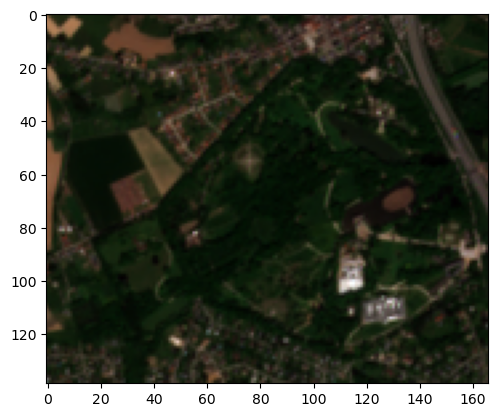

In [213]:
rearrangedData=np.transpose(colourClipped,(1, 2, 0))
plt.imshow(rearrangedData)

## Masked Cloud

In [23]:
datacubeMeise = connection.load_collection(
    'SENTINEL2_L2A',
    spatial_extent={"west": 4.312323, "south":  50.922796, "east": 4.335497, "north": 50.934860},
    temporal_extent = ["2021-06-11", "2021-06-11"],
    bands=["B04", "B03", "B02", "SCL"]
)

In [26]:
maskedCube = maskClouds(datacubeMeise)
maskedCube.download("maskedCube.tiff")

In [64]:
file_path = "maskedCube.tiff"
with rasterio.open(file_path) as dataset:
    # Read the data into a numpy array
    data = dataset.read()
rgb = data[:3,:,:]
#rgb[rgb<0]=0

In [49]:
minVector=np.amin(rgb, axis=(1,2)).reshape(3,1,1)
maxVector=np.amax(rgb, axis=(1,2)).reshape(3,1,1)
colourScaled= (rgb-minVector)/(maxVector-minVector)*255
colourClipped = np.clip(colourScaled, 0, 255).astype(np.uint8)

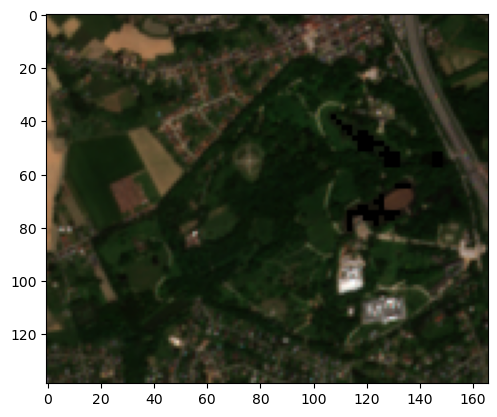

In [42]:
visualizeArray(rgb)

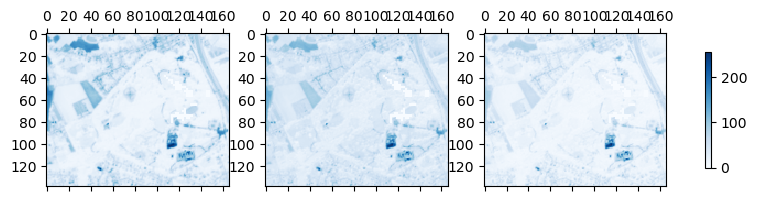

In [62]:
fig, axes = plt.subplots(1,3,figsize=(10,30))
ims=[]
for ax, arr in zip(axes.flatten(), colourClipped):
    im=ax.matshow(arr, cmap="Blues")
    ims.append(im)
# Add a single colorbar to the right of all subplots
fig.colorbar(ims[0], ax=axes.ravel().tolist(), shrink=0.05)
plt.show()

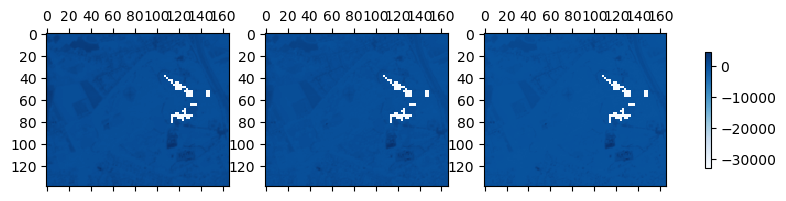

In [65]:
fig, axes = plt.subplots(1,3,figsize=(10,30))
ims=[]
for ax, arr in zip(axes.flatten(), rgb):
    im=ax.matshow(arr, cmap="Blues")
    ims.append(im)
# Add a single colorbar to the right of all subplots
fig.colorbar(ims[0], ax=axes.ravel().tolist(), shrink=0.05)
plt.show()

In [9]:
datacubeMeise = connection.load_collection(
    'SENTINEL2_L2A',
    spatial_extent={"west": 4.312323, "south":  50.922796, "east": 4.335497, "north": 50.934860},
    temporal_extent = ["2021-06-10", "2021-06-10"],
    bands=["B04", "B03", "B02"]
)

## Vegetation Index

In [155]:
def visualizeTIFF(tiffFile):
    with rasterio.open(tiffFile) as src:
        data = src.read()
    rearrangedData=np.transpose(data,(1, 2, 0))
    
    # Step 1: Rescale the values to the range 0-255
    scaled_array = (rearrangedData - np.min(rearrangedData)) / (np.max(rearrangedData) - np.min(rearrangedData)) * 255

    # Step 2: Clip values to ensure they are within the 0-255 range
    scaled_array = np.clip(scaled_array, 0, 255)

    # Step 3: Convert to integers (as RGB values should be integers)
    scaled_array = scaled_array.astype(np.uint8)
    
    plt.imshow(scaled_array)

## Temperature Map

Temperature is one of the essential variables that is needed to accurately describe an ecological system. Through openEO we have access to the Sentinel-3 data which focusses on SLTR measurements (Sea and Land Surface Temperature Radiometry)

In [144]:
# Describe the AGERA5 collection
connection.describe_collection("SENTINEL3_SLSTR")

{'cube:dimensions': {'bands': {'type': 'bands',
   'values': ['S1',
    'S2',
    'S3',
    'S4',
    'S5',
    'S6',
    'S7',
    'S8',
    'S9',
    'F1',
    'F2']},
  't': {'extent': ['2016-04-17T11:33:13Z', None],
   'step': 'P1D',
   'type': 'temporal'},
  'x': {'axis': 'x',
   'extent': [-180, 180],
   'reference_system': 4326,
   'type': 'spatial'},
  'y': {'axis': 'y',
   'extent': [-85, 85],
   'reference_system': 4326,
   'type': 'spatial'}},
 'description': 'Sentinel 3 imagery captured by SLSTR sensor',
 'extent': {'spatial': {'bbox': [[-180.0, -85.0, 180.0, 85.0]]},
  'temporal': {'interval': [['2016-04-17T11:33:13Z', None]]}},
 'id': 'SENTINEL3_SLSTR',
 'license': 'proprietary',
 'links': [{'href': 'https://sh.dataspace.copernicus.eu/api/v1/catalog/1.0.0/collections/sentinel-3-slstr/queryables',
   'rel': 'http://www.opengis.net/def/rel/ogc/1.0/queryables',
   'type': 'application/schema+json'},
  {'href': 'https://sh.dataspace.copernicus.eu/api/v1/catalog/1.0.0/collections/sentinel-3-slstr/items',
   'rel': 'items',
   'type': 'application/geo+json'},
  {'href': 'https://openeofed.dataspace.copernicus.eu/openeo/1.2/collections',
   'rel': 'root'},
  {'href': 'https://openeofed.dataspace.copernicus.eu/openeo/1.2/collections',
   'rel': 'parent'},
  {'href': 'https://openeofed.dataspace.copernicus.eu/openeo/1.2/collections/SENTINEL3_SLSTR',
   'rel': 'self'}],
 'providers': [],
 'sci:citation': 'Modified Copernicus Sentinel data [Year]/Sentinel Hub',
 'stac_extensions': ['https://stac-extensions.github.io/scientific/v1.0.0/schema.json',
  'https://stac-extensions.github.io/sat/v1.0.0/schema.json',
  'https://stac-extensions.github.io/eo/v1.0.0/schema.json'],
 'stac_version': '1.0.0',
 'summaries': {'eo:bands': [{'center_wavelength': 0.55427,
    'description': 'Cloud screening, vegetation monitoring, aerosol',
    'full_width_half_max': 0.01926,
    'name': 'S1',
    'openeo:gsd': {'unit': '°',
     'value': [0.004960317460317, 0.004960317460317]}},
   {'center_wavelength': 0.65947,
    'description': 'NDVI, vegetation monitoring, aerosol',
    'full_width_half_max': 0.01925,
    'name': 'S2',
    'openeo:gsd': {'unit': '°',
     'value': [0.004960317460317, 0.004960317460317]}},
   {'center_wavelength': 0.868,
    'description': 'NDVI, cloud flagging, pixel co-registration',
    'full_width_half_max': 0.0206,
    'name': 'S3',
    'openeo:gsd': {'unit': '°',
     'value': [0.004960317460317, 0.004960317460317]}},
   {'center_wavelength': 1.3748,
    'description': 'Cirrus detection over land',
    'full_width_half_max': 0.0208,
    'name': 'S4',
    'openeo:gsd': {'unit': '°',
     'value': [0.004960317460317, 0.004960317460317]}},
   {'center_wavelength': 1.6134,
    'description': 'Cloud clearing, ice, snow, vegetation monitoring',
    'full_width_half_max': 0.06068,
    'name': 'S5',
    'openeo:gsd': {'unit': '°',
     'value': [0.004960317460317, 0.004960317460317]}},
   {'center_wavelength': 2.2557,
    'description': 'Vegetation state and cloud clearing',
    'full_width_half_max': 0.05015,
    'name': 'S6',
    'openeo:gsd': {'unit': '°',
     'value': [0.004960317460317, 0.004960317460317]}},
   {'center_wavelength': 3.742,
    'description': 'SST, LST, Active fire',
    'full_width_half_max': 0.398,
    'name': 'S7',
    'openeo:gsd': {'unit': '°',
     'value': [0.009920634920333, 0.009920634920333]}},
   {'center_wavelength': 10.854,
    'description': 'SST, LST, Active fire',
    'full_width_half_max': 0.776,
    'name': 'S8',
    'openeo:gsd': {'unit': '°',
     'value': [0.009920634920333, 0.009920634920333]}},
   {'center_wavelength': 12.0225,
    'description': 'SST, LST',
    'full_width_half_max': 0.905,
    'name': 'S9',
    'openeo:gsd': {'unit': '°',
     'value': [0.009920634920333, 0.009920634920333]}},
   {'center_wavelength': 3.742,
    'description': 'Active fire',
    'full_width_half_max': 0.398,
    'name': 'F1',
    'openeo:gsd': {'unit': '°',
     'value': [0.009920634920333, 0.00

The S9 band of this collection represents the Sea Surface Temperature (SST) and the Land Surface Temperature (LST) accessing this band will provide us information about the thermal radiation of the surface of the Earth

In [72]:
dataCubeMeise_Temp = connection.load_collection(
    "SENTINEL3_SLSTR",
    spatial_extent=meiseSpatial,
    temporal_extent = ["2021-06-10", "2021-06-10"],
    bands=["S9"]
)

In [73]:
dataCubeMeise_Temp.download("dcMeise_Temp.tiff")

OpenEoApiError: [500] Internal: Server error: Exception during Spark execution: org.openeo.geotrellissentinelhub.SentinelHubException: Sentinel Hub returned an error
response: HTTP/1.0 503 Service Unavailable with body: <html><body><h1>503 Service Unavailable</h1>
No server is available to handle this request.
</body></html>


request: POST https://sh.dataspace.copernicus.eu/api/v1/process with (possibly abbreviated) body: {
      "input": {
        "bounds": {
          "bbox": [4.312323, 49.665018730197374, 5.582164269802624, 50.93486],
          "properties": {
            "crs": "http://www.opengis.net/def/crs/EPSG/0/4326"
          }
        },
        "data": [
          {
            "type": "sentinel-3-slstr",
            "dataFilter": {"timeRange":{"from":"2021-06-10T00:00:00Z","to":"2021-06-11T00:00:00Z"}},
            "processing": {}
          }
        ]
      },
      "output": {
        "width": 128,
        "height": 128,
        "responses": [
          {
            "identifier": "default",
            "format": {
              "type": "image/tiff"
            }
          }
        ]
      },
      "evalscript": "//VERSION=3\nfunction setup() {\n  return {\n    input: [{\n      \"bands\": [\"S9\"]\n    }],\n    output: {\n      bands: 1,\n      sampleType: \"FLOAT32\",\n    }\n  };\n}\n\nfunction evaluatePixel(sample) {\n  return [sample.S9];\n}"
    }... (Upstream ref: 'r-2504090914314c78aa4818a1f189121e') (ref: r-2504090914304d4dae236d69d3a89b7c)

## Climate Maps

The precipitation can be relevant to determine how suitable a given area is to support plant growth and the maintenance of populations of different kinds of Fauna.

Through openEO we can access the ERA5 dataset that contains precipitation data

In [4]:
# Describe the AGERA5 collection
connection.describe_collection("AGERA5")

{'cube:dimensions': {'bands': {'type': 'bands',
   'values': ['dewpoint-temperature',
    'precipitation-flux',
    'solar-radiation-flux',
    'temperature-max',
    'temperature-mean',
    'temperature-min',
    'vapour-pressure',
    'wind-speed']},
  't': {'extent': ['2015-01-01T00:00:00Z', None], 'type': 'temporal'},
  'x': {'axis': 'x',
   'extent': [-180.05, 179.95],
   'reference_system': 4326,
   'step': 0.1,
   'type': 'spatial'},
  'y': {'axis': 'y',
   'extent': [-90.05, 90.05],
   'reference_system': 4326,
   'step': 0.1,
   'type': 'spatial'}},
 'description': "This dataset provides daily surface meteorological data at 0.1°x0.1° spatial resolution for the period from 2015 to present as input for agro-ecological studies. This dataset is based on the hourly ECMWF ERA5 data at surface level and is referred to as AgERA5. Acquisition and pre-processing of the original ERA5 data is a complex and specialized job. By providing the AgERA5 dataset, users are freed from this work and can directly start with meaningful input for their analyses and modelling. To this end, the variables provided in this dataset match the input needs of most agro-ecological models.\n\nData were aggregated to daily time steps at the local time zone and corrected towards a finer topography at a 0.1° spatial resolution. The correction to the 0.1° grid was realized by applying grid and variable-specific regression equations to the ERA5 dataset interpolated at 0.1° grid. The equations were trained on ECMWF's operational high-resolution atmospheric model (HRES) at a 0.1° resolution. This way the data is tuned to the finer topography, finer land use pattern and finer land-sea delineation of the ECMWF HRES model.\n\nThe data was produced on behalf of the Copernicus Climate Change Service.\n\nThis dataset is marked as experimental because the integration in this backend has not yet been fully validated. Use with caution.",
 'extent': {'spatial': {'bbox': [[-180.05, -90.05, 179.95, 90.05]]},
  'temporal': {'interval': [['2015-01-01T00:00:00Z', None]]}},
 'id': 'AGERA5',
 'license': 'proprietary',
 'links': [{'href': 'https://cds.climate.copernicus.eu/cdsapp#!/dataset/sis-agrometeorological-indicators',
   'rel': 'alternate',
   'title': 'Product web page.'},
  {'href': 'https://openeo.vito.be/openeo/1.2/collections', 'rel': 'root'},
  {'href': 'https://openeo.vito.be/openeo/1.2/collections', 'rel': 'parent'},
  {'href': 'https://openeo.vito.be/openeo/1.2/collections/AGERA5',
   'rel': 'self'}],
 'stac_extensions': ['https://stac-extensions.github.io/datacube/v2.2.0/schema.json',
  'https://stac-extensions.github.io/eo/v1.1.0/schema.json'],
 'stac_version': '0.9.0',
 'summaries': {'eo:bands': [{'description': 'Mean dewpoint temperature at a height of 2 metres above the surface over the period 00h-24h local time. The dew point is the temperature to which air must be cooled to become saturated with water vapor. In combination with the air temperature it is used to assess relative humidity.',
    'name': 'dewpoint-temperature'},
   {'description': 'Total volume of liquid water (mm3) precipitated over the period 00h-24h local time per unit of area (mm2), per day.',
    'name': 'precipitation-flux'},
   {'description': 'Total amount of energy provided by solar radiation at the surface over the period 00-24h local time per unit area and time.',
    'name': 'solar-radiation-flux'},
   {'description': 'Maximum air temperature at 2m height (daily maximum)',
    'name': 'temperature-max'},
   {'description': 'Mean air temperature at 2m height (daily mean)',
    'name': 'temperature-mean'},
   {'description': 'Minimum air temperature at 2m height (daily minimum)',
    'name': 'temperature-min'},
   {'description': 'Contribution to the total atmospheric pressure provided by the water vapour over the period 00-24h local time per unit of time.',
    'name': 'vapour-pressure'},
   {'description': 'Mean wind speed at a height of 10 metres above the surface over the perio

In [7]:
dataCubeMeise_Climate = connection.load_collection(
    "AGERA5",
    spatial_extent=meiseSpatial,
    temporal_extent = ["2021-06-10", "2021-06-10"],
    bands=["precipitation-flux",
           "solar-radiation-flux",
           "temperature-max",
           "temperature-mean",
           "temperature-min",
           "vapour-pressure",
           "wind-speed"]
)

In [8]:
dataCubeMeise_Climate

In [11]:
dataCubeMeise_Climate.download("dcMeise_climate.tiff")

OpenEoApiError: [401] TokenExchangeFailure: Authentication failed. Please login on our marketplace web https://portal.terrascope.be first, and then try authenticate again.

## Height Map

In [ ]:
sclBand = datacubeMeise_scl.band("SCL")
#mask out the clouds in the Scene Classification Layer
cloudMask = (sclBand = 1)

## Pollution Map

The most common forms of pollution that are relevant for biodiversity/ecology research are 
* Nitrous oxide ($NO_{2}$)
* Sulphur oxide ($SO_2$)
* Ozone ($O_3$)
* Carbon Monoxide ($CO$)
* Aerosol Index 
* Methane ($CH_4$)
* Formaldehyde 

Sentinel 5 has this information available

In [79]:
connection.describe_collection('SENTINEL_5P_L2')

{'cube:dimensions': {'bands': {'type': 'bands',
   'values': ['CO',
    'HCHO',
    'NO2',
    'O3',
    'SO2',
    'CH4',
    'AER_AI_340_380',
    'AER_AI_354_388',
    'CLOUD_BASE_PRESSURE',
    'CLOUD_TOP_PRESSURE',
    'CLOUD_BASE_HEIGHT',
    'CLOUD_TOP_HEIGHT',
    'CLOUD_OPTICAL_THICKNESS',
    'CLOUD_FRACTION',
    'dataMask']},
  't': {'extent': ['2018-04-30T00:18:50Z', None],
   'step': 'P1D',
   'type': 'temporal'},
  'x': {'axis': 'x',
   'extent': [-180, 180],
   'reference_system': 4326,
   'type': 'spatial'},
  'y': {'axis': 'y',
   'extent': [-85, 85],
   'reference_system': 4326,
   'type': 'spatial'}},
 'description': 'Sentinel 5 Precursor imagery captured by TROPOMI sensor.\n\nThis dataset only supports loading one band at a time.',
 'extent': {'spatial': {'bbox': [[-180.0, -85.0, 180.0, 85.0]]},
  'temporal': {'interval': [['2018-04-30T00:18:50Z', None]]}},
 'id': 'SENTINEL_5P_L2',
 'license': 'proprietary',
 'links': [{'href': 'https://sh.dataspace.copernicus.eu/api/v1/catalog/1.0.0/collections/sentinel-5p-l2/queryables',
   'rel': 'http://www.opengis.net/def/rel/ogc/1.0/queryables',
   'type': 'application/schema+json'},
  {'href': 'https://sh.dataspace.copernicus.eu/api/v1/catalog/1.0.0/collections/sentinel-5p-l2/items',
   'rel': 'items',
   'type': 'application/geo+json'},
  {'href': 'https://openeofed.dataspace.copernicus.eu/openeo/1.2/collections',
   'rel': 'root'},
  {'href': 'https://openeofed.dataspace.copernicus.eu/openeo/1.2/collections',
   'rel': 'parent'},
  {'href': 'https://openeofed.dataspace.copernicus.eu/openeo/1.2/collections/SENTINEL_5P_L2',
   'rel': 'self'}],
 'providers': [],
 'sci:citation': 'Modified Copernicus Sentinel data [Year]/Sentinel Hub',
 'stac_extensions': ['https://stac-extensions.github.io/scientific/v1.0.0/schema.json',
  'https://stac-extensions.github.io/sat/v1.0.0/schema.json',
  'https://docs.sentinel-hub.com/api/latest/stac/s5p/v1.0.0/schema.json'],
 'stac_version': '1.0.0',
 'summaries': {'eo:bands': [{'data_type': 'float32',
    'description': 'Carbon monoxide',
    'name': 'CO',
    'openeo:gsd': {'unit': '°',
     'value': [0.054563492063483, 0.034722222222216]},
    'statistics': {'maximum': [0.1], 'minimum': [0]}},
   {'data_type': 'float32',
    'description': 'Formaldehyde',
    'name': 'HCHO',
    'openeo:gsd': {'unit': '°',
     'value': [0.054563492063483, 0.034722222222216]},
    'statistics': {'maximum': [0.001], 'minimum': [0]}},
   {'data_type': 'float32',
    'description': 'Nitrogen oxide',
    'name': 'NO2',
    'openeo:gsd': {'unit': '°',
     'value': [0.054563492063483, 0.034722222222216]},
    'statistics': {'maximum': [0.0003], 'minimum': [0]}},
   {'data_type': 'float32',
    'description': 'Ozone',
    'name': 'O3',
    'openeo:gsd': {'unit': '°',
     'value': [0.054563492063483, 0.034722222222216]},
    'statistics': {'maximum': [0.36], 'minimum': [0]}},
   {'data_type': 'float32',
    'description': 'Sulphur dioxide',
    'name': 'SO2',
    'openeo:gsd': {'unit': '°',
     'value': [0.054563492063483, 0.034722222222216]},
    'statistics': {'maximum': [0.01], 'minimum': [0]}},
   {'data_type': 'float32',
    'description': 'Methane',
    'name': 'CH4',
    'openeo:gsd': {'unit': '°',
     'value': [0.054563492063483, 0.034722222222216]},
    'statistics': {'maximum': [2000], 'minimum': [1600]}},
   {'data_type': 'float32',
    'description': 'UV (Ultraviolet) Aerosol Index calculated based on wavelengths of 340 nm and 380 nm',
    'name': 'AER_AI_340_380',
    'openeo:gsd': {'unit': '°',
     'value': [0.054563492063483, 0.034722222222216]},
    'statistics': {'maximum': [5], 'minimum': [-1]}},
   {'data_type': 'float32',
    'description': 'UV (Ultraviolet) Aerosol Index calculated based on wavelengths of 354 nm and 388 nm',
    'name': 'AER_AI_354_388',
    'openeo:gsd': {'unit': '°',
     'value': [0.054563492063483, 0.034722222222216]},
    'statistics': {'maximum': [5], 'minimum': [-1]}},
   {'data_type': 'float32',
    'descrip

In [80]:
dataCubeMeise_Pollution = connection.load_collection(
    "SENTINEL_5P_L2",
    spatial_extent=belgiumSpatialSpatial,
    temporal_extent = ["2021-06-10", "2021-06-10"],
    bands=["CO",
           "HCHO",
           "NO2",
           "SO2",
           "O3",
           "CH4",
           "AER_AI_340_380",
           "AER_AI_354_388"]
)

In [160]:
dataCubeEU_gas = connection.load_collection(
    "SENTINEL_5P_L2",
    spatial_extent=europeSpatial,
    temporal_extent = ["2023-04-01", "2023-05-01"],
    bands=["HCHO",
           "dataMask"]
)

maskBand = dataCubeEU_gas.band("dataMask")
dataCubeEU_gas = dataCubeEU_gas.mask(maskBand)
dataCubeEU_HCHO = dataCubeEU_gas.band("HCHO")
dataCubeEU_HCHO = dataCubeEU_HCHO.reduce_dimension(dimension="t",reducer="mean")

In [163]:
dataCubeEU_HCHO.download("dcEU_HCHO.tiff")

OpenEoApiError: [500] Internal: Server error: Exception during Spark execution: org.openeo.geotrellissentinelhub.SentinelHubException: Sentinel Hub returned an error
response: HTTP/1.1 401 Unauthorized with body: {"error":{"status":401,"reason":"Unauthorized","message":"You are not authorized! AccessToken signature expired.","code":"COMMON_UNAUTHORIZED"}}
request: POST https://sh.dataspace.copernicus.eu/api/v1/process with (possibly abbreviated) body: {
      "input": {
        "bounds": {
          "bbox": [25.68576388888077, 62.185167111112705, 32.669890873006594, 66.62961155555635],
          "properties": {
            "crs": "http://www.opengis.net/def/crs/EPSG/0/4326"
          }
        },
        "data": [
          {
            "type": "sentinel-5p-l2",
            "dataFilter": {"timeRange":{"from":"2023-04-13T00:00:00Z","to":"2023-04-14T00:00:00Z"}},
            "processing": {}
          }
        ]
      },
      "output": {
        "width": 128,
        "height": 128,
        "responses": [
          {
            "identifier": "default",
            "format": {
              "type": "image/tiff"
            }
          }
        ]
      },
      "evalscript": "//VERSION=3\nfunction setup() {\n  return {\n    input: [{\n      \"bands\": [\"HCHO\", \"dataMask\"]\n    }],\n    output: {\n      bands: 2,\n      sampleType: \"FLOAT32\",\n    }\n  };\n}\n\nfunction evaluatePixel(sample) {\n  return [sample.HCHO, sample.dataMask];\n}"
    }... (Upstream ref: 'r-2504091152304719a4d7e93cb62644ad') (ref: r-25040911522947ee8bdd4516fe007da8)

In [ ]:
file_path = "dcEU_HCHO.tiff"
with rasterio.open(file_path) as dataset:
    # Read the data into a numpy array
    data = dataset.read()
data

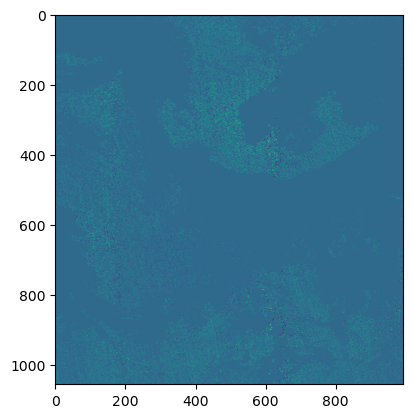

In [158]:
plt.imshow(data[0])

In [102]:
dataCubeBelgium_AER_1 = connection.load_collection(
    "SENTINEL_5P_L2",
    spatial_extent=belgiumSpatial,
    temporal_extent = ["2021-06-01", "2021-07-01"],
    bands=["AER_AI_340_380"]
)

dataCubeBelgium_AER_1= dataCubeBelgium_AER_1.aggregate_temporal_period(reducer="mean", period="day")

In [103]:
dataCubeMeise_AER_1.download("dcMeise_AER_1.tiff")

In [104]:
file_path = "dcMeise_AER_1.tiff"
with rasterio.open(file_path) as dataset:
    # Read the data into a numpy array
    data = dataset.read()
data

array([[[-1.4332199 , -1.4354688 , -1.4685594 , ..., -0.669442  ,
         -0.8158249 , -0.7150851 ],
        [-1.4399819 , -1.4456844 , -1.4685594 , ..., -0.49273378,
         -0.8158249 , -0.7150851 ],
        [-1.4583137 , -1.4827064 , -1.5041937 , ..., -0.6562668 ,
         -0.872956  , -0.73148924],
        ...,
        [-0.7940848 , -0.7858348 , -0.84108526, ..., -0.61480355,
         -0.5559797 , -0.5666543 ],
        [-0.8193923 , -0.7940848 , -0.8428451 , ..., -0.61480355,
         -0.512571  , -0.57272655],
        [-0.79916334, -0.80450344, -0.8428451 , ..., -0.5416823 ,
         -0.512571  , -0.57272655]]], shape=(1, 59, 71), dtype=float32)

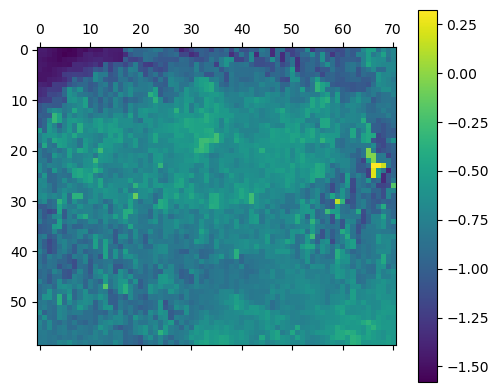

In [105]:
plt.matshow(data[0])
plt.colorbar()

In [84]:
dataCubeMeise_HCHO = connection.load_collection(
    "SENTINEL_5P_L2",
    spatial_extent=meiseSpatial,
    temporal_extent = ["2021-06-10", "2021-06-10"],
    bands=["HCHO"]
)

In [85]:
dataCubeMeise_HCHO.download("dcMeise_HCHO.tiff")

## Band Math

In [56]:
# define child process, use ProcessBuilder
def scale_function(x: ProcessBuilder):
    return x.linear_scale_range(0, 255)

### NDVI

In [57]:
#Process is standardly defined within the processes of the data cube
datacubeMeise_ndvi = datacubeMeise.ndvi()

#Explicit arguments can also be used for this function
datacubeMeise_ndvi = datacubeMeise.ndvi(nir="B08", red="B04", target_band="NDVI")

Alternatively we can define our own functions that operate on the bands of a datacube

In [58]:
# necessary imports
from openeo.processes import array_element, normalized_difference

# define an NDVI function
def ndvi_function(data):
    B04 = array_element(data, index = 1) # array_element takes either an index ..
    B08 = array_element(data, label = "B08") # or a label

    # ndvi = (B08 - B04) / (B08 + B04) # implement NDVI as formula ..
    ndvi = normalized_difference(B08, B04) # or use the openEO "normalized_difference" process
    
    return ndvi

# supply the defined function to a reduce_dimension process, set dimension = "bands"
datacubeMeise_ndvi = datacubeMeise.reduce_dimension(reducer = ndvi_function, dimension = "bands")
datacubeMeise_ndvi_scaled = datacubeMeise_ndvi.apply(scale_function)

In [70]:
# save using save_result, give format as string
res_ndvi_scaled = datacubeMeise_ndvi_scaled.save_result(format = "GTiff")

# send job to back-end, do not execute
job = res_ndvi_scaled.create_job(title = "Meise_NDVI_scaled")

# Starts the job and waits until it finished to download the result.
job.start_and_wait()
job.get_results().download_files("Meise_NDVI_scaled")

0:00:00 Job 'cdse-j-250403141940438fad7c93d03842553a': send 'start'
0:00:15 Job 'cdse-j-250403141940438fad7c93d03842553a': created (progress 0%)
0:00:20 Job 'cdse-j-250403141940438fad7c93d03842553a': created (progress 0%)
0:00:27 Job 'cdse-j-250403141940438fad7c93d03842553a': created (progress 0%)
0:00:35 Job 'cdse-j-250403141940438fad7c93d03842553a': queued (progress 0%)
0:00:45 Job 'cdse-j-250403141940438fad7c93d03842553a': queued (progress 0%)
0:00:58 Job 'cdse-j-250403141940438fad7c93d03842553a': queued (progress 0%)
0:01:14 Job 'cdse-j-250403141940438fad7c93d03842553a': queued (progress 0%)
0:01:33 Job 'cdse-j-250403141940438fad7c93d03842553a': queued (progress 0%)
0:01:58 Job 'cdse-j-250403141940438fad7c93d03842553a': queued (progress 0%)
0:02:29 Job 'cdse-j-250403141940438fad7c93d03842553a': queued (progress 0%)
0:03:07 Job 'cdse-j-250403141940438fad7c93d03842553a': queued (progress 0%)
0:03:54 Job 'cdse-j-250403141940438fad7c93d03842553a': running (progress N/A)
0:04:52 Job 'cd

[WindowsPath('Meise_NDVI_scaled/openEO_2021-06-01Z.tif'),
 WindowsPath('Meise_NDVI_scaled/job-results.json')]

In [ ]:
def visualize_NDVI_TIFF(tiffFile):
    with rasterio.open(tiffFile) as src:
        data = src.read()
    # Step 1: Rescale the values to the range 0-255
    scaled_array = (data - np.min(data)) / (np.max(data) - np.min(data)) * 255

    # Step 2: Clip values to ensure they are within the 0-255 range
    scaled_array = np.clip(scaled_array, 0, 255)

    # Step 3: Convert to integers (as RGB values should be integers)
    scaled_array = scaled_array.astype(np.uint8)
    
    plt.imshow(scaled_array)



Alternatively we can perform band math directly 

In [50]:
# extract and reduce all bands via "band"
B02 = datacubeMeise.band("B02")
B04 = datacubeMeise.band("B04")
B08 = datacubeMeise.band("B08")

# write formula
datacubeMeise_evi = (2.5 * (B08 - B04)) / ((B08 + 6.0 * B04 - 7.5 * B02) + 1.0)
datacubeMeise_evi_scaled = datacubeMeise_evi.apply(scale_function)

In [ ]:
# save using save_result, give format as string
res_evi_scaled = datacubeMeise_ndvi_scaled.save_result(format = "GTiff")

# send job to back-end, do not execute
job = res.create_job(title = "Meise_NDVI_scaled")

# Starts the job and waits until it finished to download the result.
job.start_and_wait()
job.get_results().download_files("Meise_NDVI_scaled")

# OpenEO cookbook

https://openeo.org/documentation/1.0/cookbook/#input-load-collection

In [60]:
meiseCoordinates={"west": 4.312323, "south":  50.922796, "east": 4.335497, "north": 50.934860}
timeRange = ["2021-05-01", "2021-08-30"]

In [18]:
connection.list_collections()

[{'description': 'Sentinel 3 imagery captured by OLCI sensor',
  'extent': {'spatial': {'bbox': [[-180.0, -85.0, 180.0, 85.0]]},
   'temporal': {'interval': [['2016-04-17T11:33:13Z', None]]}},
  'id': 'SENTINEL3_OLCI_L1B',
  'license': 'proprietary',
  'links': [{'href': 'https://sh.dataspace.copernicus.eu/api/v1/catalog/1.0.0/collections/sentinel-3-olci/queryables',
    'rel': 'http://www.opengis.net/def/rel/ogc/1.0/queryables',
    'type': 'application/schema+json'},
   {'href': 'https://sh.dataspace.copernicus.eu/api/v1/catalog/1.0.0/collections/sentinel-3-olci/items',
    'rel': 'items',
    'type': 'application/geo+json'},
   {'href': 'https://openeofed.dataspace.copernicus.eu/openeo/1.2/collections',
    'rel': 'root'},
   {'href': 'https://openeofed.dataspace.copernicus.eu/openeo/1.2/collections',
    'rel': 'parent'},
   {'href': 'https://openeofed.dataspace.copernicus.eu/openeo/1.2/collections/SENTINEL3_OLCI_L1B',
    'rel': 'self'}],
  'providers': [],
  'stac_extensions': ['https://stac-extensions.github.io/scientific/v1.0.0/schema.json',
   'https://stac-extensions.github.io/sat/v1.0.0/schema.json',
   'https://stac-extensions.github.io/eo/v1.0.0/schema.json'],
  'stac_version': '1.0.0',
  'title': 'Sentinel 3 OLCI'},
 {'description': 'Sentinel 3 imagery captured by SLSTR sensor',
  'extent': {'spatial': {'bbox': [[-180.0, -85.0, 180.0, 85.0]]},
   'temporal': {'interval': [['2016-04-17T11:33:13Z', None]]}},
  'id': 'SENTINEL3_SLSTR',
  'license': 'proprietary',
  'links': [{'href': 'https://sh.dataspace.copernicus.eu/api/v1/catalog/1.0.0/collections/sentinel-3-slstr/queryables',
    'rel': 'http://www.opengis.net/def/rel/ogc/1.0/queryables',
    'type': 'application/schema+json'},
   {'href': 'https://sh.dataspace.copernicus.eu/api/v1/catalog/1.0.0/collections/sentinel-3-slstr/items',
    'rel': 'items',
    'type': 'application/geo+json'},
   {'href': 'https://openeofed.dataspace.copernicus.eu/openeo/1.2/collections',
    'rel': 'root'},
   {'href': 'https://openeofed.dataspace.copernicus.eu/openeo/1.2/collections',
    'rel': 'parent'},
   {'href': 'https://openeofed.dataspace.copernicus.eu/openeo/1.2/collections/SENTINEL3_SLSTR',
    'rel': 'self'}],
  'providers': [],
  'stac_extensions': ['https://stac-extensions.github.io/scientific/v1.0.0/schema.json',
   'https://stac-extensions.github.io/sat/v1.0.0/schema.json',
   'https://stac-extensions.github.io/eo/v1.0.0/schema.json'],
  'stac_version': '1.0.0',
  'title': 'Sentinel 3 SLSTR'},
 {'description': 'Sentinel 5 Precursor imagery captured by TROPOMI sensor.\n\nThis dataset only supports loading one band at a time.',
  'extent': {'spatial': {'bbox': [[-180.0, -85.0, 180.0, 85.0]]},
   'temporal': {'interval': [['2018-04-30T00:18:50Z', None]]}},
  'id': 'SENTINEL_5P_L2',
  'license': 'proprietary',
  'links': [{'href': 'https://sh.dataspace.copernicus.eu/api/v1/catalog/1.0.0/collections/sentinel-5p-l2/queryables',
    'rel': 'http://www.opengis.net/def/rel/ogc/1.0/queryables',
    'type': 'application/schema+json'},
   {'href': 'https://sh.dataspace.copernicus.eu/api/v1/catalog/1.0.0/collections/sentinel-5p-l2/items',
    'rel': 'items',
    'type': 'application/geo+json'},
   {'href': 'https://openeofed.dataspace.copernicus.eu/openeo/1.2/collections',
    'rel': 'root'},
   {'href': 'https://openeofed.dataspace.copernicus.eu/openeo/1.2/collections',
    'rel': 'parent'},
   {'href': 'https://openeofed.dataspace.copernicus.eu/openeo/1.2/collections/SENTINEL_5P_L2',
    'rel': 'self'}],
  'providers': [],
  'stac_extensions': ['https://stac-extensions.github.io/scientific/v1.0.0/schema.json',
   'https://stac-extensions.github.io/sat/v1.0.0/schema.json',
   'https://docs.sentinel-hub.com/api/latest/stac/s5p/v1.0.0/schema.json'],
  'stac_version': '1.0.0',
  'title': 'Sentinel 5 Precursor'},
 {'description': '[EXPERIMENTAL] Copernicus High Resolution Land Vegetation Phenology and Productivity parameters at 10m on yearly basis from 2017 onwards for EU countries.

In [62]:
cube_s2_b348 = connection.load_collection(
    "SENTINEL2_L2A",
    spatial_extent = meiseCoordinates,
    temporal_extent = timeRange,
    bands = ["B03", "B04", "B08"]
)

In [63]:
cube_s2_b8 = cube_s2_b348.filter_bands(bands = ["B08"])

In [64]:
# reduce all timesteps
# mean_time() is a shortcut function
cube_s2_b8_red = cube_s2_b8.mean_time()

# additionally, reduce second collection
cube_s2_b348_red = cube_s2_b348.mean_time()

To create a PNG output, we need to scale the satellite data we have down to the 8bit range of a PNG image. For this, the scale range of our imagery has to be known. For Sentinel 2 over urban and agricultural areas, we can use 6000 as a maximum.

In [65]:
# define child process, use ProcessBuilder
def scale_function(x: ProcessBuilder):
    return x.linear_scale_range(0, 6000, 0, 255)

# apply scale_function to all pixels
cube_s2_b348_red_lin = cube_s2_b348_red.apply(scale_function)

In [66]:
# save using save_result, give format as string
res = cube_s2_b8_red.save_result(format = "GTiff")

# send job to back-end, do not execute
job = res.create_job(title = "temporal_mean_as_GTiff_py")

We want to produce a false-color composite highlighting the vegetation in red (as seen below the code). For that, we want to assign the infrared band (B8) to the red channel, the red band (B4) to the green channel and the green band (B3) to the blue channel. 

In [67]:
# save result cube as PNG
res = cube_s2_b348_red_lin.save_result(format = "PNG", options = {
        "red": "B08",
        "green": "B04",
        "blue": "B03"
      })

# send job to back-end
job = res.create_job(title = "temporal_mean_as_PNG_py")

In [68]:
# Starts the job and waits until it finished to download the result.
job.start_and_wait()
job.get_results().download_files("output")

0:00:00 Job 'cdse-j-25040313291847de9b62cfa61dcda226': send 'start'


OpenEoApiError: [500] Internal: Server error: ClientError('An error occurred (SlowDown) when calling the ListBuckets operation (reached max retries: 4): None') (Upstream ref: 'r-25040313292145969a79889cf44a4ca5') (ref: r-2504031329204a4fab13a42359a4e0da)

In [32]:
pellworm = {"west": 8.5464, "south": 54.4473, "east": 9.0724, "north": 54.5685}
t = ["2021-03-05", "2021-03-05"]

cube_s2 = connection.load_collection(
    "SENTINEL2_L2A",
    spatial_extent = pellworm,
    temporal_extent = t,
    bands = ["B02", "B04", "B08", "SCL"]
)

In [39]:
cube_s2.band("B02")

In [36]:
# Function to linearly scale each band (0-1 scaling)
def scale_band(band, min_val, max_val):
    """
    Linearly scales the values of a band to the range [min_val, max_val].
    """
    return (band - np.min(band)) / (np.max(band) - np.min(band)) * (max_val - min_val) + min_val

# Apply scaling for RGB bands (B04 -> Red, B02 -> Green, B08 -> Blue)
# Red: B04, Green: B02, Blue: B08
scaled_cube = cube_s2.band("B04").apply(lambda band: scale_band(band, 0, 255))  # Red channel scaling
.band("B02").apply(lambda band: scale_band(band, 0, 255))  # Green channel scaling
    .band("B08").apply(lambda band: scale_band(band, 0, 255))  # Blue channel scaling

IndentationError: unexpected indent (2788454814.py, line 12)

In [35]:
# apply scale_function to all pixels
#cube_s2_lin = cube_s2.apply(scale_function)
res = cube_s2.save_result(format = "PNG", options = {
        "red": "B04",
        "green": "B08",
        "blue": "B02"
      })

# send job to back-end
job = res.create_job(title = "pellworm_py")
job.start_and_wait()
job.get_results().download_files("pellworm_482")

0:00:00 Job 'cdse-j-2504021159434925ab809ee9e6242317': send 'start'
0:00:13 Job 'cdse-j-2504021159434925ab809ee9e6242317': created (progress 0%)
0:00:21 Job 'cdse-j-2504021159434925ab809ee9e6242317': created (progress 0%)
0:00:28 Job 'cdse-j-2504021159434925ab809ee9e6242317': running (progress N/A)
0:00:36 Job 'cdse-j-2504021159434925ab809ee9e6242317': running (progress N/A)
0:00:46 Job 'cdse-j-2504021159434925ab809ee9e6242317': running (progress N/A)
0:00:58 Job 'cdse-j-2504021159434925ab809ee9e6242317': running (progress N/A)
0:01:14 Job 'cdse-j-2504021159434925ab809ee9e6242317': running (progress N/A)
0:01:33 Job 'cdse-j-2504021159434925ab809ee9e6242317': running (progress N/A)
0:01:58 Job 'cdse-j-2504021159434925ab809ee9e6242317': running (progress N/A)
0:02:28 Job 'cdse-j-2504021159434925ab809ee9e6242317': running (progress N/A)
0:03:05 Job 'cdse-j-2504021159434925ab809ee9e6242317': finished (progress 100%)


[WindowsPath('pellworm/out.png'), WindowsPath('pellworm/job-results.json')]

NO